In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge,ElasticNet,Lars,SGDRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
#warnings.filterwarnings('ignore')

In [2]:
!ls

Datasets
Hyperparameter Tuning With GridSearch.ipynb
MultipleRegressionModels_automobile.ipynb
SimpleRegression_CategoricalValues_ExamScores.ipynb
mpg-preprocessed.csv
pluralsight-automobiles.ipynb


In [3]:
automobile_df=pd.read_csv('./mpg-preprocessed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
6,31.0,4,112.0,85,2575,16.2,38
283,20.2,6,200.0,88,3060,17.1,39
68,26.0,4,98.0,79,2255,17.7,44
372,38.0,4,105.0,63,2125,14.7,38
150,23.5,6,173.0,110,2725,12.6,39


In [4]:
result_dict={}

In [5]:
def build_model(regression_fn,
                name_of_y_col,
                name_of_x_col,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    X=dataset[name_of_x_col]
    Y=dataset[name_of_y_col]
    if preprocess_fn is not None:
        X=preprocess_fn(X)
    x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=test_frac)
    model = regression_fn(x_train,y_train)
    y_pred=model.predict(x_test)
    print(type(y_pred),type(y_test))
    print("training score",model.score(x_train,y_train))
    print("testing score",r2_score(y_test,y_pred))
    
    if show_plot_Y == True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred,label="predicted")
        plt.plot(y_test.values,label="actual")
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
    return {
        'training_score':model.score(x_train,y_train),
        'testing_score':r2_score(y_test,y_pred)
    }
    

In [6]:
def compare_results():
    for key in result_dict:
        print('Regression',key)
        print('training score',result_dict[key]['training_score'])
        print('testing score',result_dict[key]['testing_score'])
        print()

In [7]:
def linear_reg(x_train,y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train,y_train)
    return model


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.6971078129762647
testing score 0.6761755935242891


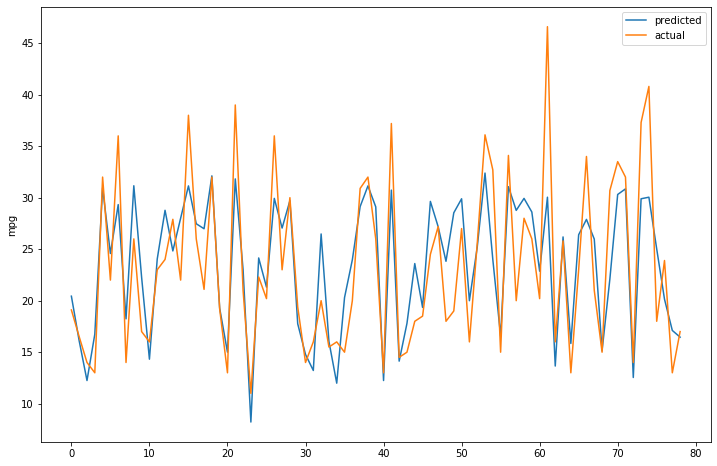

In [8]:
result_dict['mpg-single_linear']=build_model(linear_reg,'mpg',
                                             ['weight'],automobile_df,show_plot_Y=True)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7043104194765923
testing score 0.7061989346475753


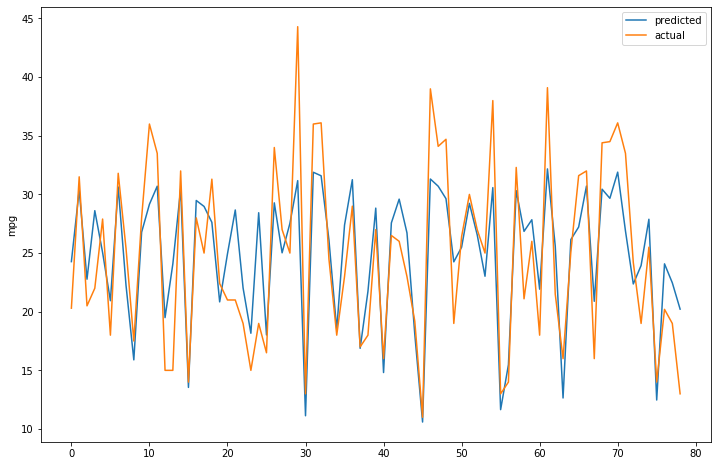

In [9]:
result_dict['mpg-kitchen_sink_linear']=build_model(linear_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7100880701309826
testing score 0.6816798911033077


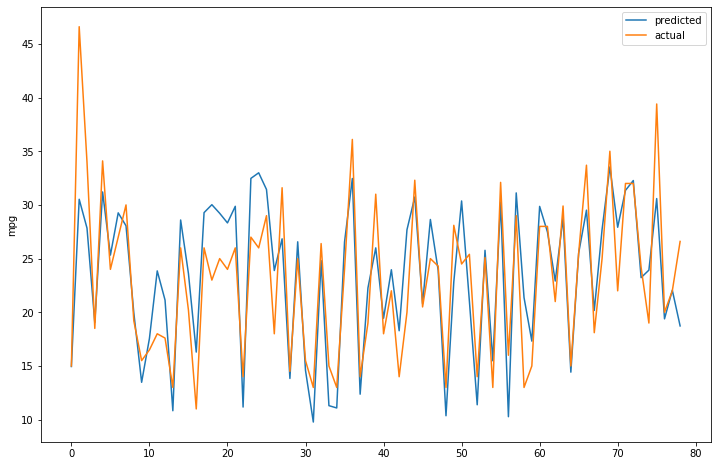

In [10]:
result_dict['mpg-parsimonious_linear']=build_model(linear_reg,
                                                   'mpg',
                                                   [
                                                       'horsepower',
                                                       'weight',
                                                    ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [11]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077



In [12]:
def lasso_reg(x_train,y_train,alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7121317410786914
testing score 0.6826625074242506


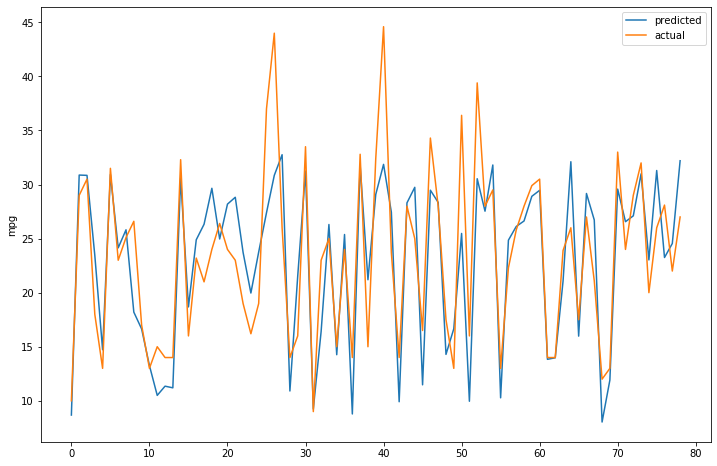

In [13]:
result_dict['mpg-kitchen_sink_lasso']=build_model(lasso_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [14]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077

Regression mpg-kitchen_sink_lasso
training score 0.7121317410786914
testing score 0.6826625074242506



In [15]:
def ridge_reg(x_train,y_train,alpha=0.5, normalize=True):
    model=Ridge(alpha=alpha,normalize=normalize)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.6749451403400185
testing score 0.7164673713629974


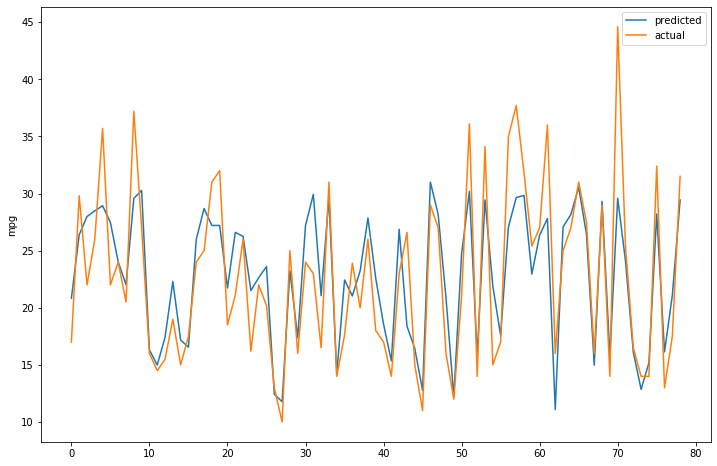

In [16]:
result_dict['mpg-kitchen_sink_ridge']=build_model(ridge_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [17]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077

Regression mpg-kitchen_sink_lasso
training score 0.7121317410786914
testing score 0.6826625074242506

Regression mpg-kitchen_sink_ridge
training score 0.6749451403400185
testing score 0.7164673713629974



In [18]:
def elastic_net_reg(x_train,y_train,alpha=1,
                   l1_ratio=0.5, normalize=False, 
                   max_iter=100000, warm_start=True,
                   equivalent_to='Elastic Net'):
    print("Equivalent to", equivalent_to)
    model= ElasticNet(alpha=alpha,l1_ratio=l1_ratio,
                      normalize=normalize,
                      warm_start=warm_start,max_iter=max_iter)
    model.fit(x_train,y_train)
    return model
    

In [19]:
from functools import partial


Equivalent to OLS
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7068882933896328
testing score 0.7043533677734873


/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2807.8152253608914, tolerance: 1.915866996805112
  positive)


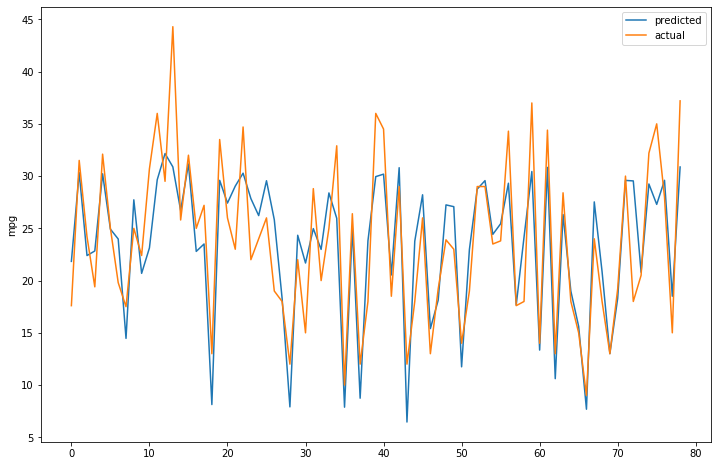

In [20]:
result_dict['mpg-kitchen_sink_elastic_net_cls']=build_model(partial(elastic_net_reg,alpha=0,equivalent_to='OLS'),
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

ordinary least square regression

Equivalent to OLS
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.709205465116663
testing score 0.6735083847530945


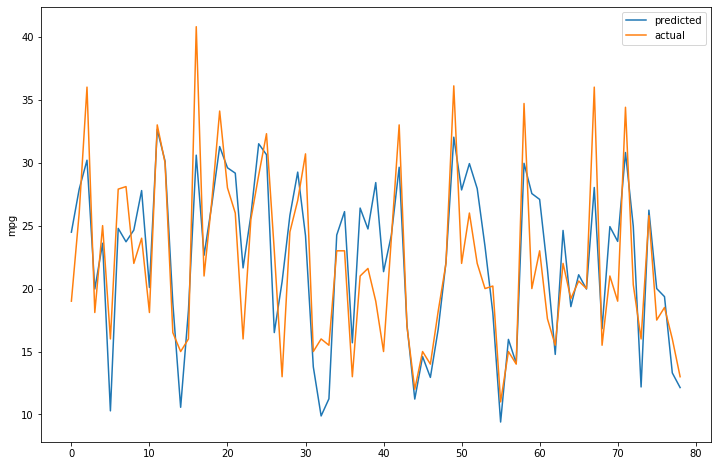

In [21]:
result_dict['mpg-kitchen_sink_elastic_net_ols']=build_model(partial(elastic_net_reg,alpha=1,equivalent_to='OLS'),
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

lasso

Equivalent to Lasso
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7033052631810184
testing score 0.7123983509543439


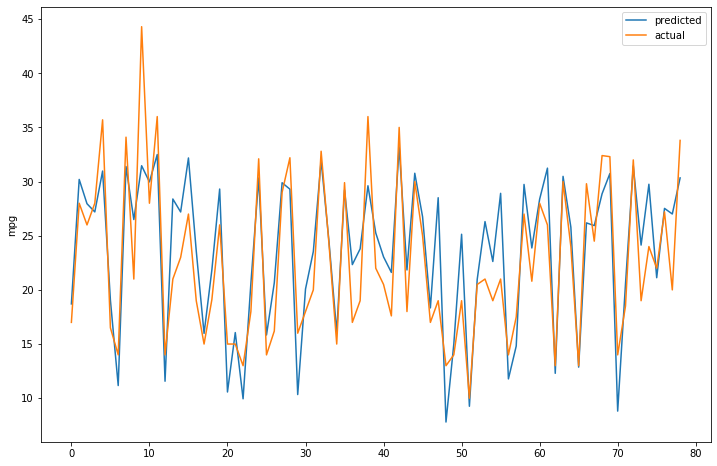

In [22]:
result_dict['mpg-kitchen_sink_elastic_net_lasso']=build_model(partial(elastic_net_reg,alpha=1,l1_ratio=1,equivalent_to='Lasso'),
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

Equivalent to Ridge


/Users/manisha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2865.3334121996945, tolerance: 1.9716875782747605
  positive)


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7095825656771761
testing score 0.6897256688705178


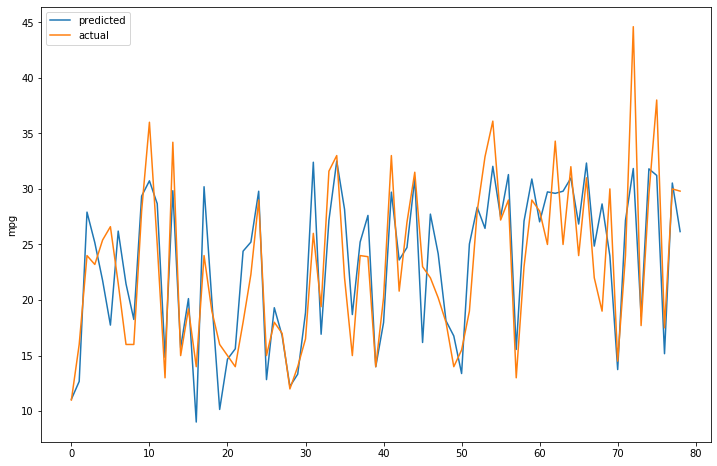

In [23]:
result_dict['mpg-kitchen_sink_elastic_net_ridge']=build_model(partial(elastic_net_reg,alpha=1,l1_ratio=0,equivalent_to='Ridge'),
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

Equivalent to Ridge
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7183823594701526
testing score 0.6499295592828093


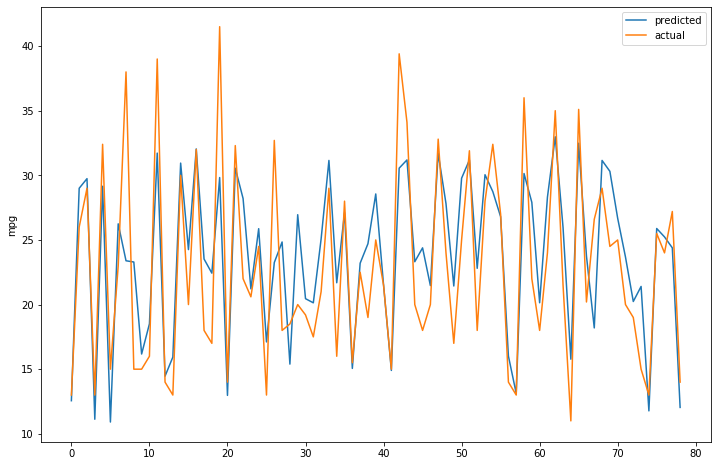

In [24]:
result_dict['mpg-kitchen_sink_elastic_net']=build_model(partial(elastic_net_reg,alpha=1,l1_ratio=0.5,equivalent_to='Ridge'),
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [25]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077

Regression mpg-kitchen_sink_lasso
training score 0.7121317410786914
testing score 0.6826625074242506

Regression mpg-kitchen_sink_ridge
training score 0.6749451403400185
testing score 0.7164673713629974

Regression mpg-kitchen_sink_elastic_net_cls
training score 0.7068882933896328
testing score 0.7043533677734873

Regression mpg-kitchen_sink_elastic_net_ols
training score 0.709205465116663
testing score 0.6735083847530945

Regression mpg-kitchen_sink_elastic_net_lasso
training score 0.7033052631810184
testing score 0.7123983509543439

Regression mpg-kitchen_sink_elastic_net_ridge
training score 0.7095825656771761
testing score 0.6897256688705178

Regression mpg-kitchen_sink_elastic_net
tr

In [26]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05,C=0.3):
    model= SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(x_train,y_train)
    return model
    

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7092950448376178
testing score 0.6601442934808662


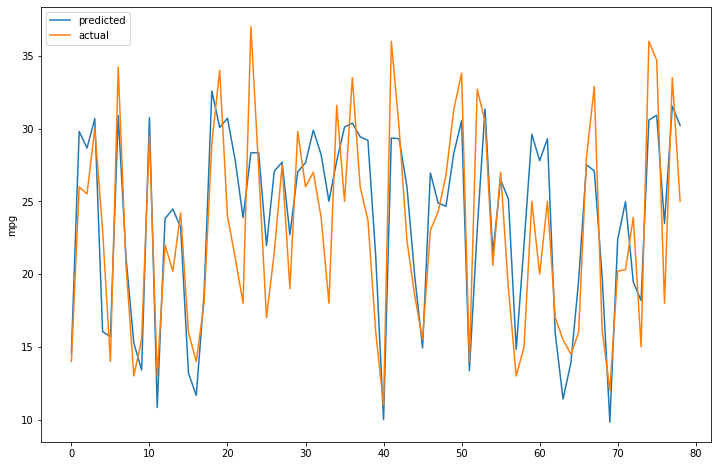

In [27]:
result_dict['mpg-kitchen_sink_svr']=build_model(svr_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [28]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077

Regression mpg-kitchen_sink_lasso
training score 0.7121317410786914
testing score 0.6826625074242506

Regression mpg-kitchen_sink_ridge
training score 0.6749451403400185
testing score 0.7164673713629974

Regression mpg-kitchen_sink_elastic_net_cls
training score 0.7068882933896328
testing score 0.7043533677734873

Regression mpg-kitchen_sink_elastic_net_ols
training score 0.709205465116663
testing score 0.6735083847530945

Regression mpg-kitchen_sink_elastic_net_lasso
training score 0.7033052631810184
testing score 0.7123983509543439

Regression mpg-kitchen_sink_elastic_net_ridge
training score 0.7095825656771761
testing score 0.6897256688705178

Regression mpg-kitchen_sink_elastic_net
tr

In [29]:
def kneighbors_reg(x_train,y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7640421063269391
testing score 0.6703616764697976


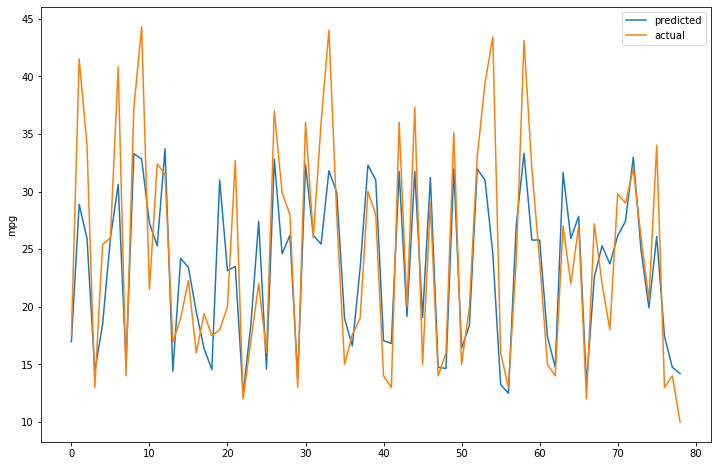

In [30]:
result_dict['mpg-kitchen_sink_kneighbors']=build_model(kneighbors_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True)

In [31]:
compare_results()

Regression mpg-single_linear
training score 0.6971078129762647
testing score 0.6761755935242891

Regression mpg-kitchen_sink_linear
training score 0.7043104194765923
testing score 0.7061989346475753

Regression mpg-parsimonious_linear
training score 0.7100880701309826
testing score 0.6816798911033077

Regression mpg-kitchen_sink_lasso
training score 0.7121317410786914
testing score 0.6826625074242506

Regression mpg-kitchen_sink_ridge
training score 0.6749451403400185
testing score 0.7164673713629974

Regression mpg-kitchen_sink_elastic_net_cls
training score 0.7068882933896328
testing score 0.7043533677734873

Regression mpg-kitchen_sink_elastic_net_ols
training score 0.709205465116663
testing score 0.6735083847530945

Regression mpg-kitchen_sink_elastic_net_lasso
training score 0.7033052631810184
testing score 0.7123983509543439

Regression mpg-kitchen_sink_elastic_net_ridge
training score 0.7095825656771761
testing score 0.6897256688705178

Regression mpg-kitchen_sink_elastic_net
tr

In [32]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [33]:
def sgd_reg(x_train,y_train,max_iter=10000,tol=1e-3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.692550393491441
testing score 0.7534108758863234


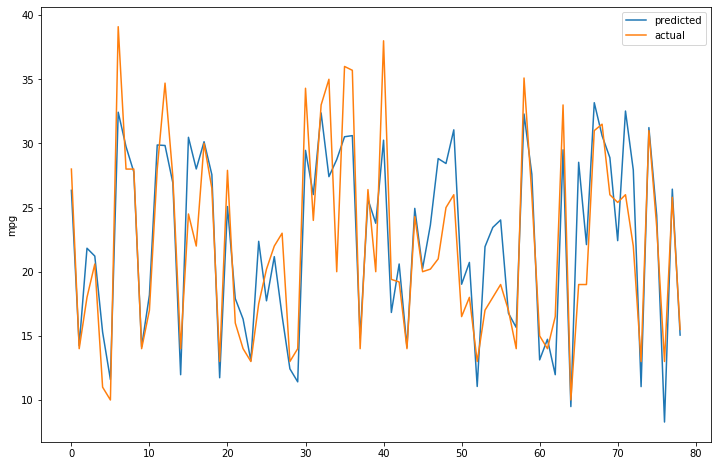

In [34]:
result_dict['mpg-kitchen_sink_sgd']=build_model(sgd_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True,
                                                   preprocess_fn=apply_standard_scaler
                                               )

In [35]:
def decision_tree_reg(x_train,y_train,max_depth=2):
    model=DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.7437872702274086
testing score 0.5649426957959778


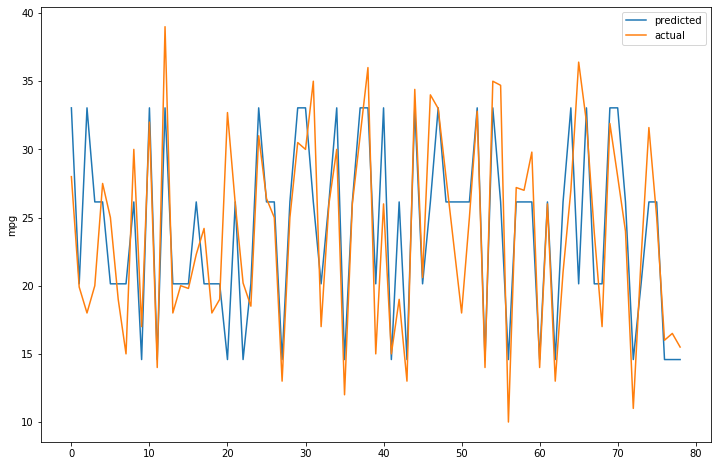

In [36]:
result_dict['mpg-kitchen_sink_decision_tree']=build_model(decision_tree_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True,
                                        
                                               )

In [37]:
def lars_reg(x_train,y_train,n_nonzero_coefs=4):
    model= Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train,y_train)
    return model

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
training score 0.6997702694810913
testing score 0.7174638680869525


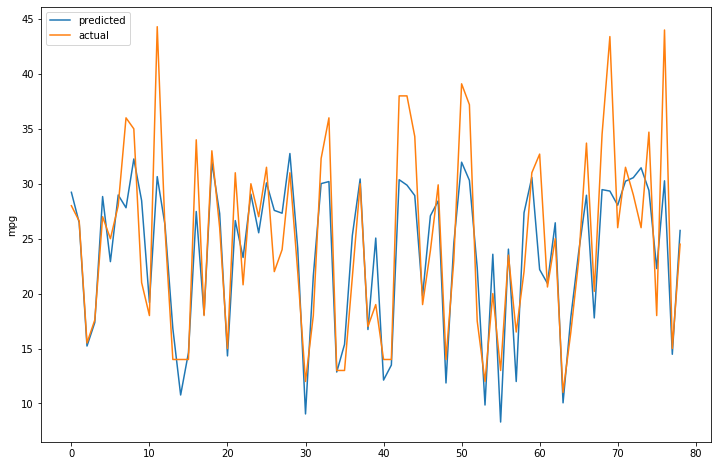

In [38]:
result_dict['mpg-kitchen_sink_lars']=build_model(lars_reg,
                                                   'mpg',
                                                   [
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'
                                                   ],
                                                   automobile_df,
                                                   show_plot_Y=True,
                                        
                                               )